In [1]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import heartpy as hp
import math

fs = 128
ds_fs = 50

data_dir = 'UMMC_DATA'
data_files = os.listdir(data_dir)

ground_truth_files = [f for f in data_files if 'ground_truth' in f]
print('ground_truth_files:', len(ground_truth_files))

peak_ref_files = [f for f in data_files if 'Peak_Ref_ECG' in f]
print('peak_ref_files:', len(peak_ref_files))

ecg_30_sec_files = [f for f in data_files if 'ECG_30sec' in f]
print('ecg_30_sec_files:', len(ecg_30_sec_files))

ref_ecg_files = [f for f in data_files if 'RefECG' in f]
print('ref_ecg_files:', len(ref_ecg_files))

info_file = 'UMass_SimbandInfo.mat'
if info_file in data_files:
    print('found info file')
else:
    print('info file is missing!')

ground_truth_files: 41
peak_ref_files: 21
ecg_30_sec_files: 7
ref_ecg_files: 41
found info file


In [2]:
signal_file = os.path.join(data_dir, f'4001.mat')
data = scipy.io.loadmat(signal_file, matlab_compatible=True, simplify_cells=True)
data['data']

{'timestamps': array([0.000000e+00, 8.000000e-03, 1.600000e-02, ..., 1.413469e+03,
        1.413477e+03, 1.413484e+03]),
 'unixTimeStamps': array([1.46582377e+12, 1.46582377e+12, 1.46582377e+12, ...,
        1.46582519e+12, 1.46582519e+12, 1.46582519e+12]),
 'physiosignal': {'ppg': {'h': {'confidenceraw': {'timestamps': array([1.46582377e+09, 1.46582377e+09, 1.46582377e+09, ...,
            1.46582518e+09, 1.46582518e+09, 1.46582518e+09]),
     'signal': array([1., 3., 3., ..., 1., 1., 1.]),
     'unixTimeStamps': array([1.46582377e+12, 1.46582377e+12, 1.46582377e+12, ...,
            1.46582518e+12, 1.46582518e+12, 1.46582518e+12])},
    'signal': array([-62338.29296875, -62344.8555625 , -62375.0669375 , ...,
           -28006.1750625 , -27880.98179687, -27759.40929688]),
    'visual': {'signal': array([-8978.59960938, -8702.36164063, -8460.79484375, ...,
             1844.90602051,  1940.3654043 ,  2039.28218555])},
    'agcCurrent': {'timestamps': array([1.46582377e+09, 1.46582378e+

In [3]:
def get_raw_ppg_signal(pid, channel=0):
    signal_file = os.path.join(data_dir, f'{pid}.mat')
    _data = scipy.io.loadmat(signal_file, matlab_compatible=True, simplify_cells=True)
    if channel not in range(8):
        channel = 0
    return _data['data']['physiosignal']['ppg'][chr(ord('a') + channel)]['signal']

def get_visual_ppg_signal(pid, channel=0):
    signal_file = os.path.join(data_dir, f'{pid}.mat')
    _data = scipy.io.loadmat(signal_file, matlab_compatible=True, simplify_cells=True)
    print(_data['data'].keys())
    if channel not in range(8):
        channel = 0
    return _data['data']['physiosignal']['ppg'][chr(ord('a') + channel)]['visual']['signal']

def get_ground_truth(pid, channel=0):
    gt_file = os.path.join(data_dir, f'{pid}_ground_truth.mat')
    _data = scipy.io.loadmat(gt_file, matlab_compatible=True, simplify_cells=True)
    if channel not in range(8):
        channel = 0
    return _data['disease_label']

def window(x, freq, start=0, sec=10):
    start_idx = math.floor(start * freq)
    end_idx = math.floor(start_idx + sec * freq)
    return x[start_idx:end_idx]

In [4]:
signal_files = set(data_files) - set(ground_truth_files + peak_ref_files + ecg_30_sec_files + ref_ecg_files + [info_file])
signal_files = list(signal_files)
print('signal_files:', len(signal_files))

signal_files: 41


In [5]:
subjects = [int(os.path.splitext(x)[0]) for x in signal_files]
subjects.sort()
print('first 5 subjects:')
subjects[:5]

first 5 subjects:


[4001, 4002, 4004, 4005, 4006]

In [6]:
processed_data_dir = 'combined_ppg'
downsampled_signals = os.listdir(processed_data_dir)
downsampled_signals = [os.path.join(processed_data_dir, f) for f in downsampled_signals]
print('downsampled signal_files:', len(downsampled_signals))

downsampled signal_files: 41


In [7]:
gt = get_ground_truth(subjects[0])
gt

array([[ 1., nan],
       [ 2.,  2.],
       [ 3.,  2.],
       [ 4.,  2.],
       [ 5.,  2.],
       [ 6.,  2.],
       [ 7.,  2.],
       [ 8.,  2.],
       [ 9.,  2.],
       [10.,  2.],
       [11.,  2.],
       [12.,  5.],
       [13.,  5.],
       [14.,  5.],
       [15.,  5.],
       [16.,  5.],
       [17.,  5.],
       [18.,  5.],
       [19.,  5.],
       [20.,  5.],
       [21.,  5.],
       [22.,  5.],
       [23.,  5.],
       [24.,  5.],
       [25.,  5.],
       [26.,  5.],
       [27.,  5.],
       [28.,  5.],
       [29.,  5.],
       [30.,  5.],
       [31.,  5.],
       [32.,  5.],
       [33.,  5.],
       [34.,  5.],
       [35.,  5.],
       [36.,  5.],
       [37.,  5.],
       [38.,  5.],
       [39.,  5.],
       [40.,  5.],
       [41.,  5.],
       [42.,  5.],
       [43.,  5.],
       [44.,  2.],
       [45.,  2.],
       [46.,  2.],
       [47.,  5.]])

In [19]:
data = scipy.io.loadmat(os.path.join(data_dir, signal_files[0]), matlab_compatible=True, simplify_cells=True)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [9]:
data['data']['band'].keys()

dict_keys(['physiosignal', 'system', 'hrv', 'accelerometer', 'heartRate', 'steps', 'setup', 'activity', 'ssb', 'ppgSelection'])

In [10]:
data['data']['band']['physiosignal'].keys()

dict_keys(['ppg2', 'ppg0', 'ecg', 'ppg5', 'ppg6', 'ppg', 'ppg4', 'ppg1', 'ppg3', 'ppg7', 'skinTemperature', 'gsr'])

In [40]:

data = scipy.io.loadmat(os.path.join(data_dir, '4001.mat'), matlab_compatible=True, simplify_cells=True)
N = len(data['data']['physiosignal']['ppg']['a']['visual']['signal'])

gt = get_ground_truth('4001')

np.floor(N / (fs * 30)) == gt.shape[0]

True

In [35]:
gt = get_ground_truth('4001')
gt.shape[0]

47

In [39]:
np.floor(N / (fs * 30)) == gt.shape[0]

True

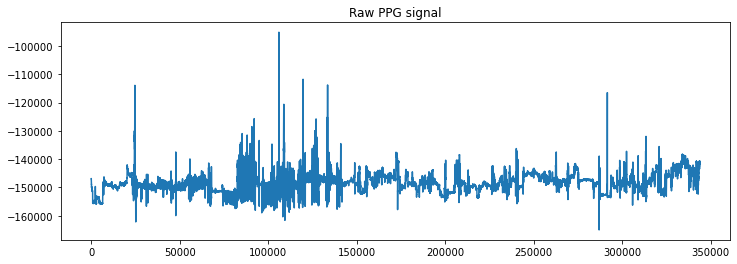

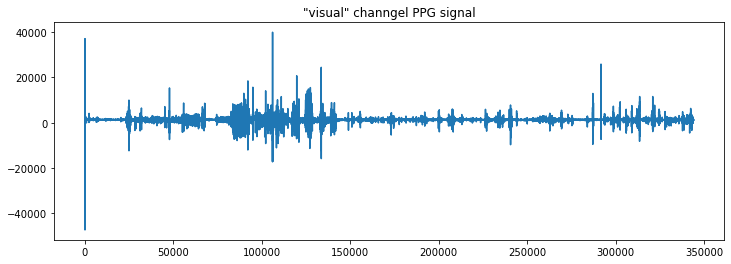

In [12]:
plt.figure(figsize=(12,4))
plt.title('Raw PPG signal')
plt.plot(data['data']['band']['physiosignal']['ppg0']['signal'])
plt.show()

plt.figure(figsize=(12,4))
plt.title('"visual" channgel PPG signal')
plt.plot(data['data']['band']['physiosignal']['ppg0']['visual']['signal'])
plt.show()

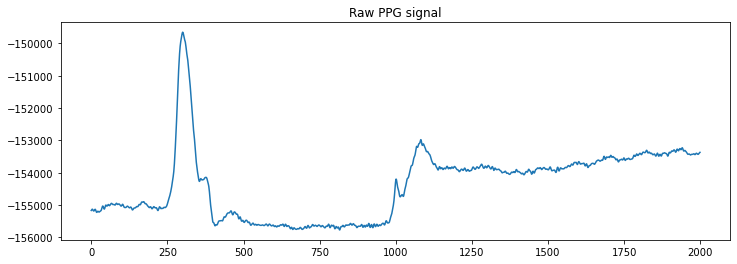

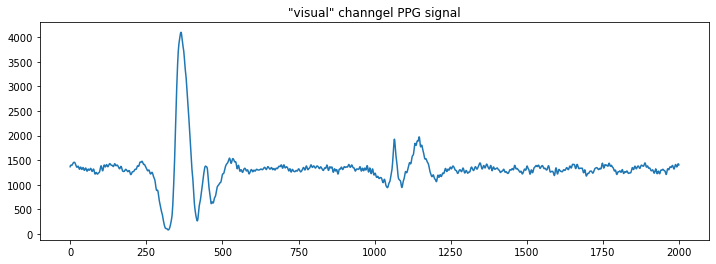

In [13]:
start_t = 2000
end_t = 4000

plt.figure(figsize=(12,4))
plt.title('Raw PPG signal')
plt.plot(data['data']['band']['physiosignal']['ppg0']['signal'][start_t:end_t])
plt.show()

plt.figure(figsize=(12,4))
plt.title('"visual" channgel PPG signal')
plt.plot(data['data']['band']['physiosignal']['ppg0']['visual']['signal'][start_t:end_t])
plt.show()

In [14]:
1 / (180 / 60), 1 / (40 / 60)

(0.3333333333333333, 1.5)

dict_keys(['timestamps', 'unixTimeStamps', 'physiosignal', 'ppgSelection', 'system', 'hrv', 'setup', 'heartRate', 'steps', 'accel', 'ssb', 'activity', 'samiParams'])


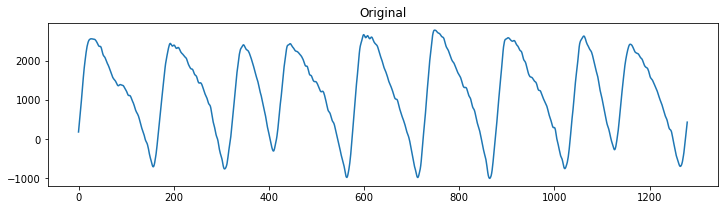

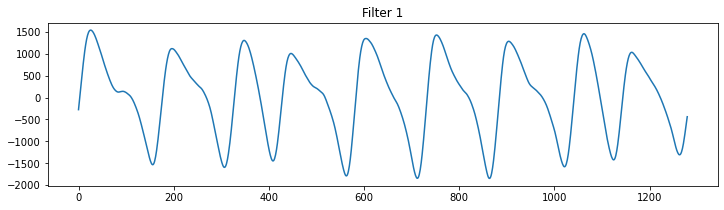

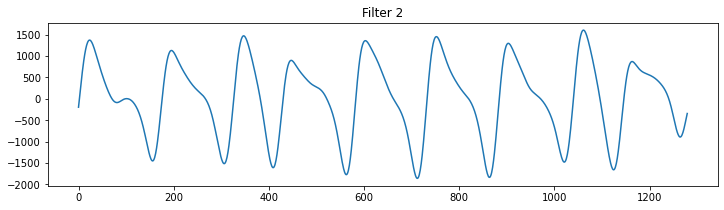

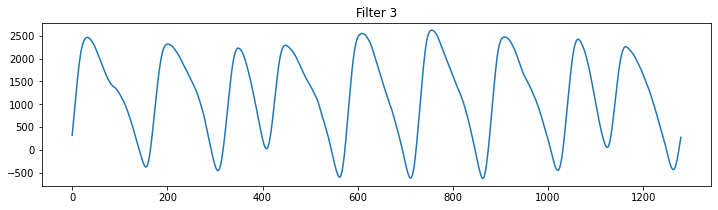

In [15]:
start_t = 3000
end_t = 4000
signal = get_visual_ppg_signal(subjects[0], 0)
s = window(signal, fs, 40, sec=10)


LOW_FREQ_FILTER = (30 / 60)
HI_FREQ_FILTER = (220 / 60)
filtered_1 = hp.filter_signal(s, [LOW_FREQ_FILTER, HI_FREQ_FILTER], sample_rate=fs, order=1, filtertype='bandpass')

LOW_FREQ_FILTER = (40 / 60)
HI_FREQ_FILTER = (200 / 60)
filtered_2 = hp.filter_signal(s, [LOW_FREQ_FILTER, HI_FREQ_FILTER], sample_rate=fs, order=2, filtertype='bandpass')

LOW_FREQ_FILTER = (40 / 60)
HI_FREQ_FILTER = (200 / 60)
filtered_3 = hp.filter_signal(s, HI_FREQ_FILTER, sample_rate=fs, order=1, filtertype='lowpass')

plt.figure(figsize=(12,3))
plt.title('Original')
plt.plot(s)
plt.show()

plt.figure(figsize=(12,3))
plt.title('Filter 1')
plt.plot(filtered_1)
plt.show()

plt.figure(figsize=(12,3))
plt.title('Filter 2')
plt.plot(filtered_2)
plt.show()

plt.figure(figsize=(12,3))
plt.title('Filter 3')
plt.plot(filtered_3)
plt.show()


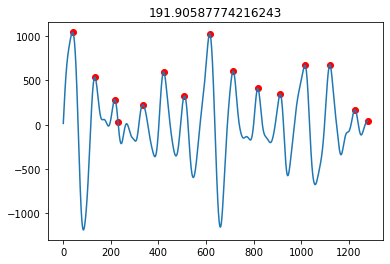

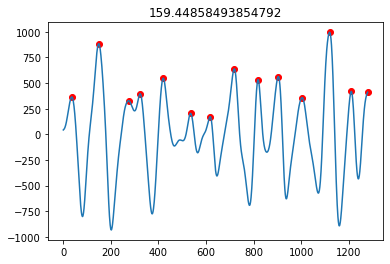

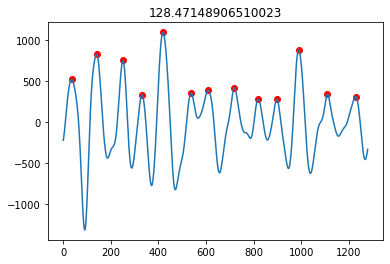

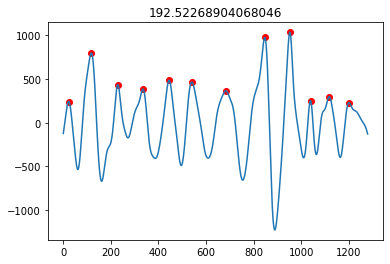

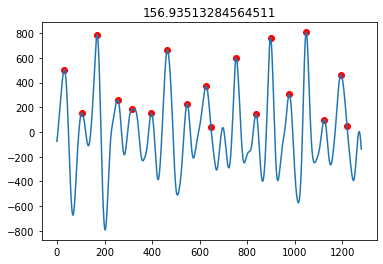

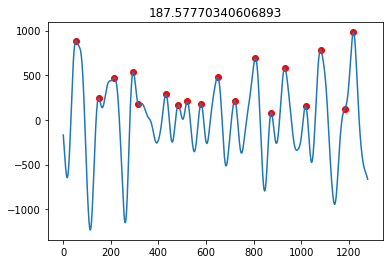

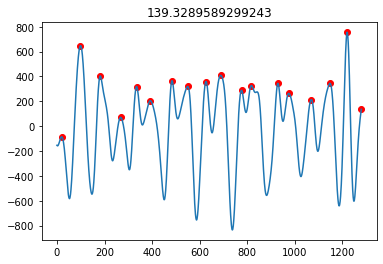

In [16]:
LOW_FREQ_FILTER = (40 / 60)
HI_FREQ_FILTER = (200 / 60)
filtered = hp.filter_signal(signal, [LOW_FREQ_FILTER, HI_FREQ_FILTER], sample_rate=fs, order=2, filtertype='bandpass')

for i in range(100):
    s = window(filtered, fs, i*10, sec=10)

    rol_mean = hp.datautils.rolling_mean(s, windowsize=0.7, sample_rate=fs)
    peaks = hp.peakdetection.detect_peaks(s, rol_mean, ma_perc=42, sample_rate=fs)
    peaks['peaklist']

    rrsd = peaks['rrsd']

    if rrsd < 200:
        plt.figure()
        plt.title(str(rrsd))
        plt.scatter(peaks['peaklist'], [s[i] for i in peaks['peaklist']], color='r')
        plt.plot(s)
        plt.show()

In [17]:
peaks['rrsd']

213.7795888671765

In [18]:
wd, measures = hp.process(filtered_1, sample_rate=fs, windowsize=0ץ7)
hp.plotter(wd, measures)

SyntaxError: invalid decimal literal (1042211746.py, line 1)

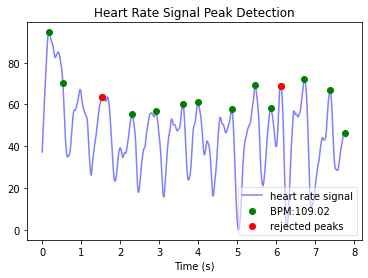

In [ ]:
wd, measures = hp.process(filtered_2, sample_rate=fs, windowsize=1)
hp.plotter(wd, measures)

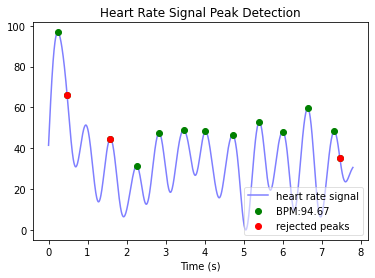

In [ ]:
x = filtered_1
wd, measures = hp.process(x, sample_rate=fs, high_precision=False)
hp.plotter(wd, measures)

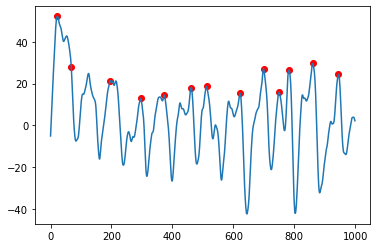

In [ ]:
x = hp.enhance_peaks(filtered_2, iterations=0)

rol_mean = hp.datautils.rolling_mean(x, windowsize=0.66, sample_rate=fs)
peaks = hp.peakdetection.detect_peaks(x, rol_mean, ma_perc=80, sample_rate=fs)
peaks['peaklist']

plt.figure()
plt.scatter(peaks['peaklist'], [x[i] for i in peaks['peaklist']], color='r')
plt.plot(x)
plt.show()

In [ ]:
s = get_visual_ppg_signal(os.path.join(data_dir, signal_files[0]), 0)
s.shape

(464832,)

In [ ]:
import math

def window(x, freq, start=0, sec=10):
    start_idx = math.floor(start * freq)
    end_idx = math.floor(start_idx + sec * freq)
    return x[start_idx:end_idx]

(1280,)


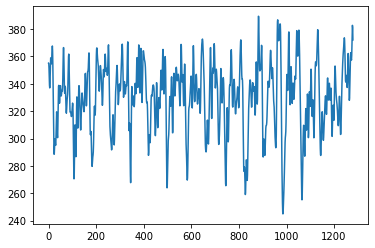

In [ ]:
w = window(s, fs, 22, sec=10)
print(w.shape)
plt.figure()
plt.plot(w)
plt.show()

In [ ]:
data['data']['band']

dict_keys(['physiosignal', 'system', 'hrv', 'accelerometer', 'heartRate', 'steps', 'setup', 'activity', 'ssb', 'ppgSelection'])

In [ ]:
data['data']['band'].keys()

dict_keys(['physiosignal', 'system', 'hrv', 'accelerometer', 'heartRate', 'steps', 'setup', 'activity', 'ssb', 'ppgSelection'])

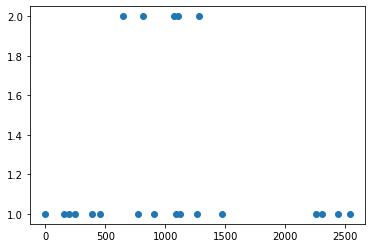

In [ ]:
act_x, act_y = data['data']['band']['activity']['timestamps'], data['data']['band']['activity']['signal']
plt.figure()
plt.scatter(act_x, act_y)
plt.show()

In [ ]:
(200 / 60)

3.3333333333333335

In [ ]:
peak_ref = scipy.io.loadmat(data_dir + '/4001_Peak_Ref_ECG.mat', matlab_compatible=True, simplify_cells=True)
peak_ref['Peak_Ref_ECG'].shape

(150, 47)

In [ ]:
gt = scipy.io.loadmat(data_dir + '/4001_ground_truth.mat', matlab_compatible=True, simplify_cells=True)
gt['disease_label']

array([[ 1., nan],
       [ 2.,  2.],
       [ 3.,  2.],
       [ 4.,  2.],
       [ 5.,  2.],
       [ 6.,  2.],
       [ 7.,  2.],
       [ 8.,  2.],
       [ 9.,  2.],
       [10.,  2.],
       [11.,  2.],
       [12.,  5.],
       [13.,  5.],
       [14.,  5.],
       [15.,  5.],
       [16.,  5.],
       [17.,  5.],
       [18.,  5.],
       [19.,  5.],
       [20.,  5.],
       [21.,  5.],
       [22.,  5.],
       [23.,  5.],
       [24.,  5.],
       [25.,  5.],
       [26.,  5.],
       [27.,  5.],
       [28.,  5.],
       [29.,  5.],
       [30.,  5.],
       [31.,  5.],
       [32.,  5.],
       [33.,  5.],
       [34.,  5.],
       [35.,  5.],
       [36.,  5.],
       [37.,  5.],
       [38.,  5.],
       [39.,  5.],
       [40.,  5.],
       [41.,  5.],
       [42.,  5.],
       [43.,  5.],
       [44.,  2.],
       [45.,  2.],
       [46.,  2.],
       [47.,  5.]])

In [ ]:
data = data
data['data']['band'].keys()

dict_keys(['physiosignal', 'system', 'hrv', 'accelerometer', 'heartRate', 'steps', 'setup', 'activity', 'ssb', 'ppgSelection'])

In [ ]:
act_x, act_y = data['data']['band']['activity']['timestamps'], data['data']['band']['activity']['signal']
plt.figure()
plt.scatter(act_x, act_y)
plt.show()

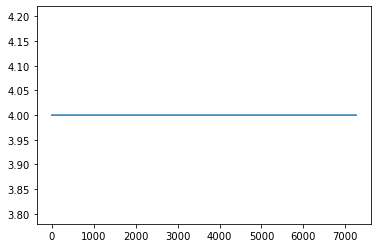

In [ ]:
y = data['data']['band']['ppgSelection']['signal']
s = data['data']['band']['physiosignal']['ppg0']['visual']['signal']

plt.figure()
plt.plot(y)
plt.show()